<a href="https://colab.research.google.com/github/Eduuvital/eduuvital/blob/main/Netflixanalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Base Netflix Filmes e Séries

Esta é uma base de dados relacionada a conteúdos de entretenimento, incluindo filmes e séries da Netflix. Cada entrada contém informações como o título do show ou filme, o tipo (filme ou série), o diretor (se aplicável), o elenco, o país de origem, a data de adição à plataforma, o ano de lançamento, a classificação por idade, a duração, categorias em que o conteúdo está listado e uma breve descrição do enredo. Esses dados podem ser utilizados para diversas finalidades, como análises de tendências de visualização, recomendação de conteúdo ou pesquisa de mercado.




# Breve Explicação da Base

In [2]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [18]:
from sklearn.preprocessing import LabelEncoder

In [40]:
import numpy as np

In [42]:
import seaborn as sns

# Breve Explicação dos Dados

In [3]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [4]:
tipos = df.dtypes
tipos

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
Unnamed: 12     object
dtype: object

In [5]:
resumo_estatistico = df.describe()
resumo_estatistico

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


from matplotlib import pyplot as plt
_df_0['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='release_year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Análise Univariada

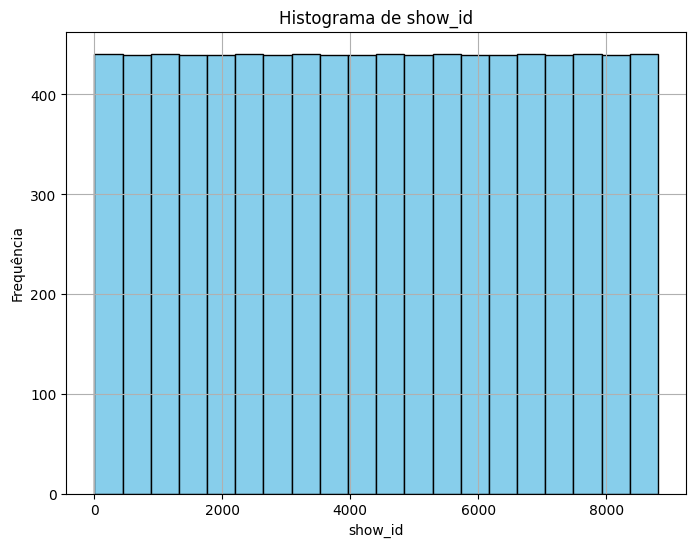

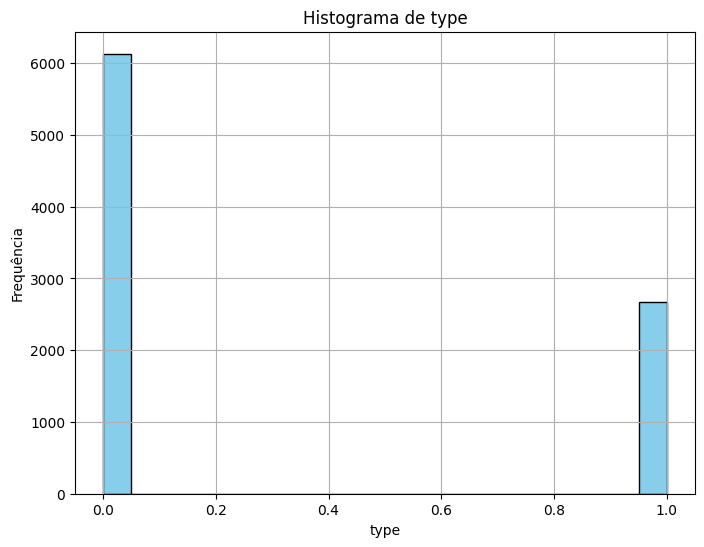

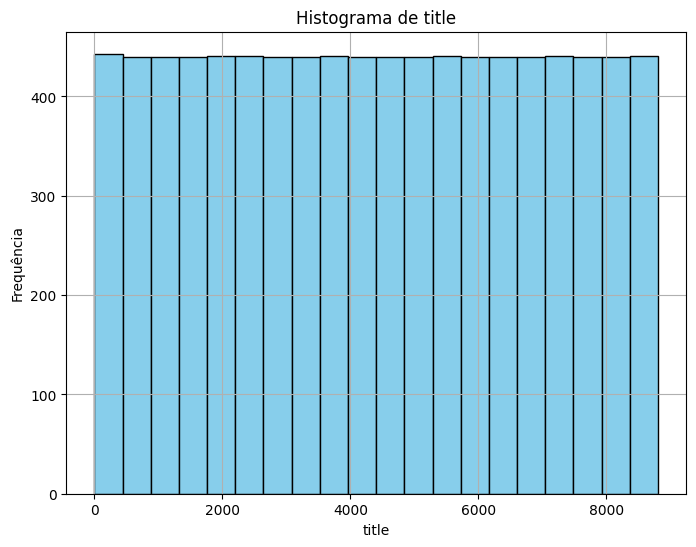

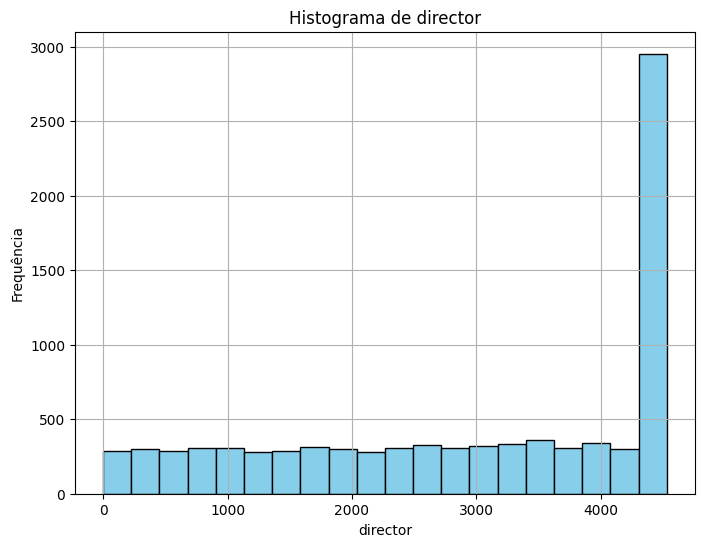

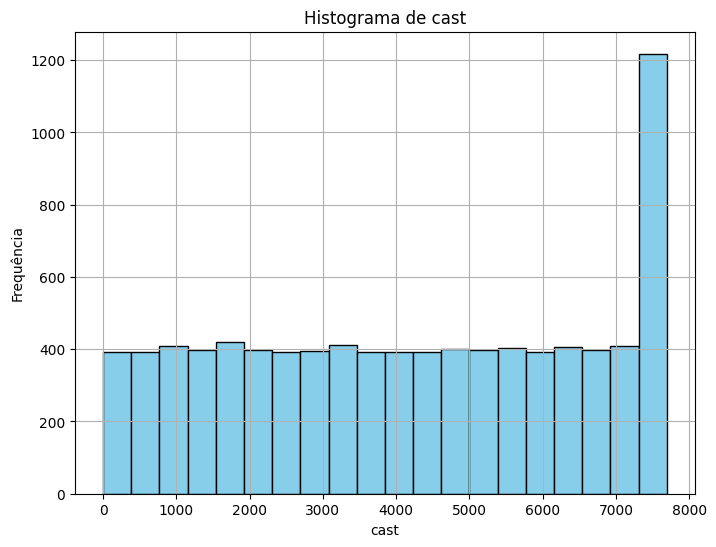

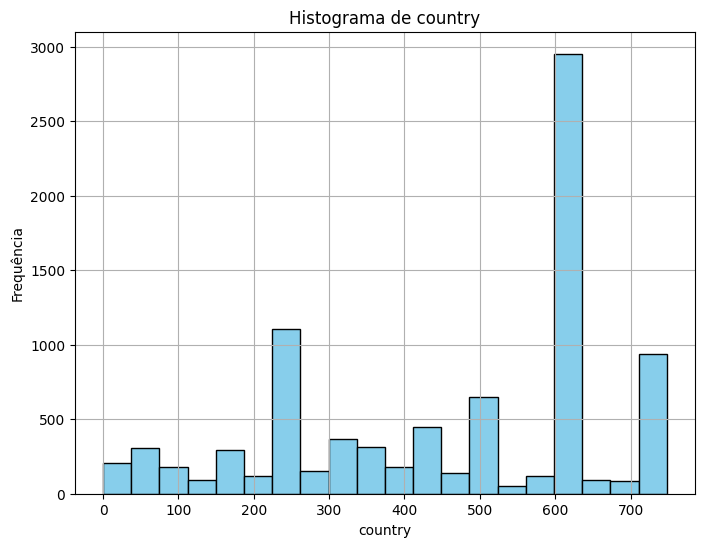

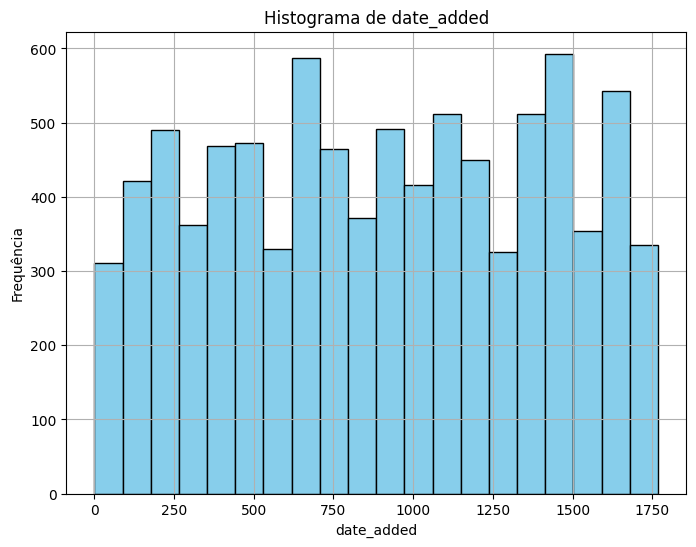

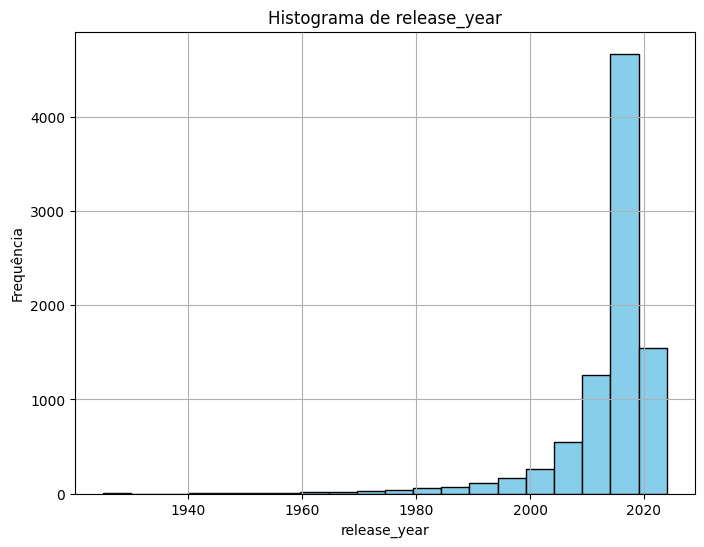

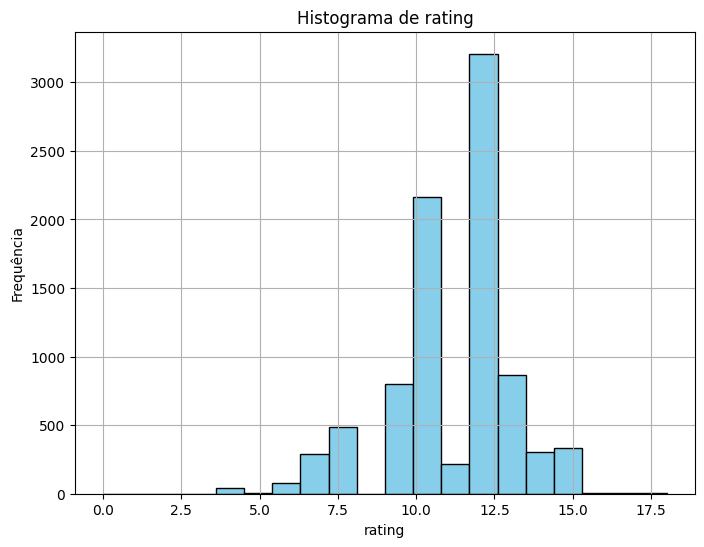

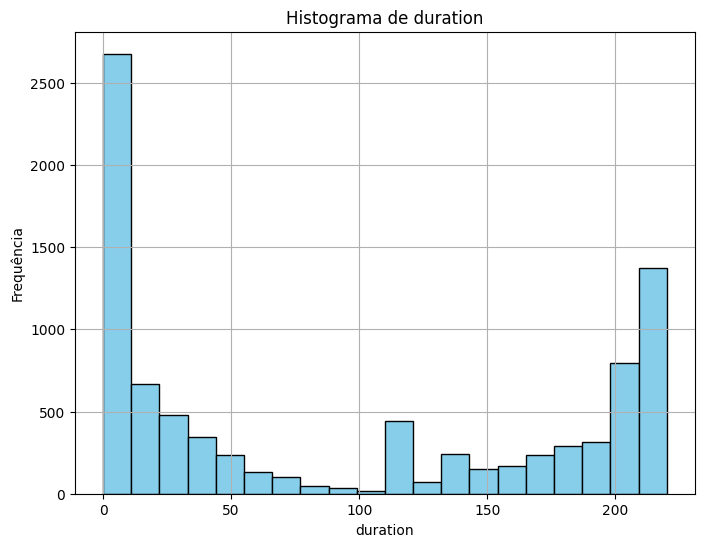

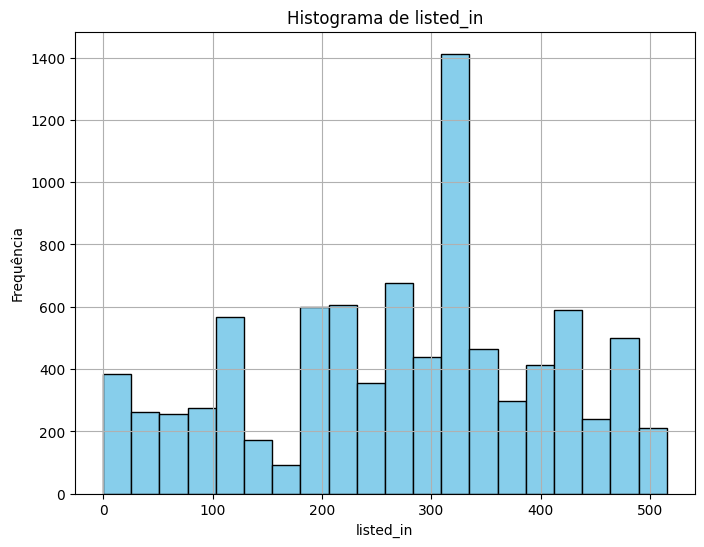

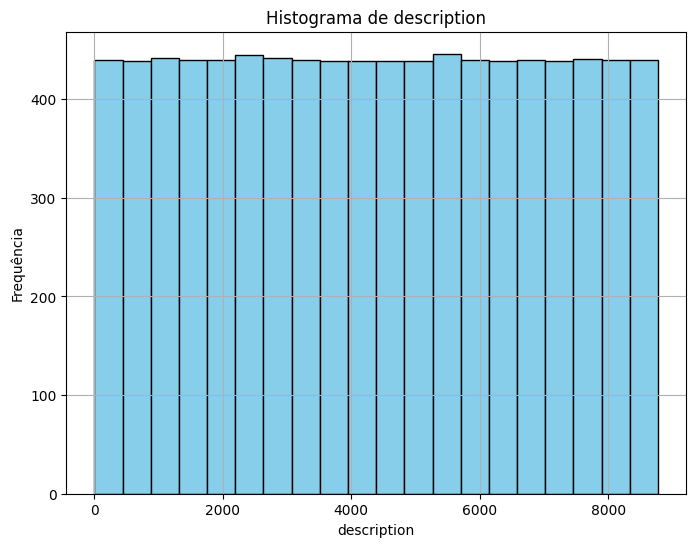

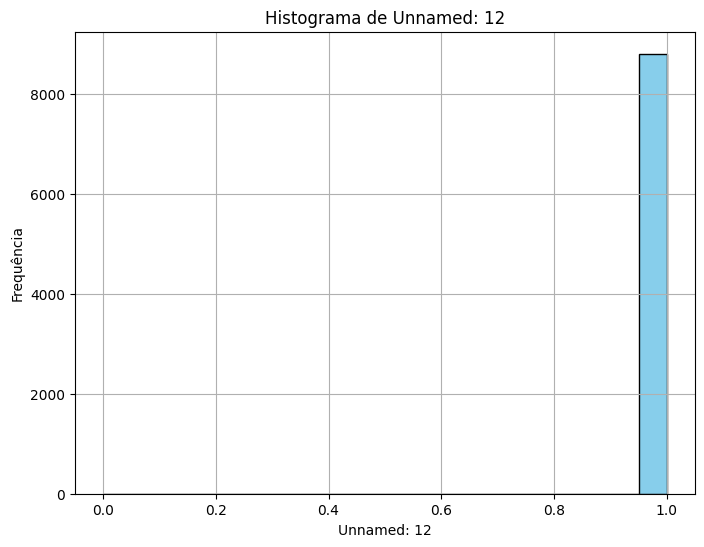

In [21]:
# 1. Identify numerical columns
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Plot histograms for numerical columns
for coluna in variaveis_numericas:
    plt.figure(figsize=(8, 6))
    plt.hist(df[coluna], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Converter colunas 'object' em valores
le = LabelEncoder()
for coluna in df.columns:
    if df[coluna].dtype == 'object':
        df[coluna] = le.fit_transform(df[coluna])

# Análise Bivariada (duas ou mais variáveis)

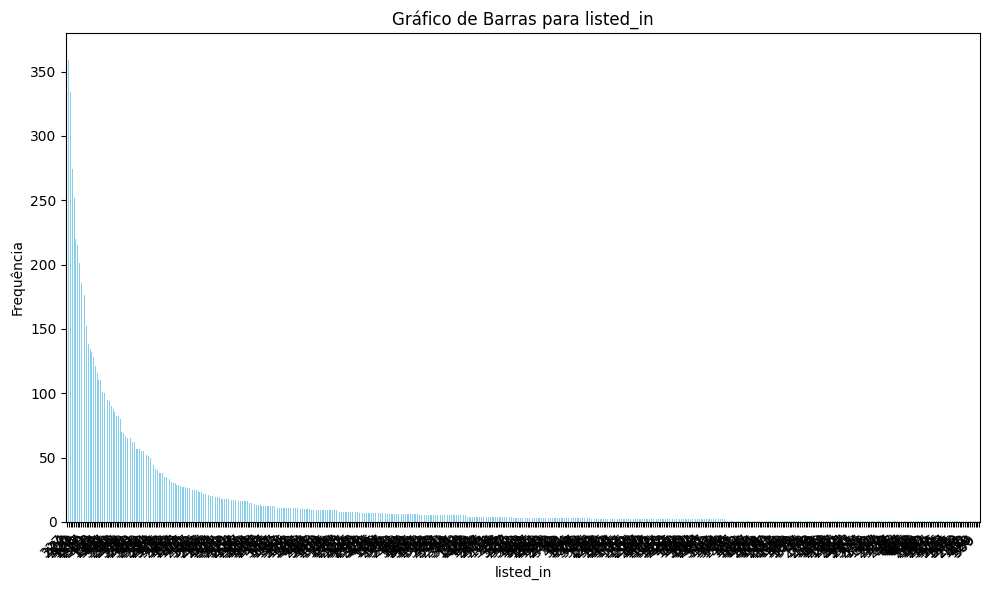

In [23]:
# 2. Separar as variáveis categóricas manualmente
# Vamos supor que estamos interessados apenas na coluna 'listed_in'
variavel_categorica = 'listed_in'
dados_categoricos = df[variavel_categorica]

# 3. Plotar um gráfico de barras para a variável categórica
plt.figure(figsize=(10, 6))
dados_categoricos.value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Gráfico de Barras para {variavel_categorica}')
plt.xlabel(variavel_categorica)
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

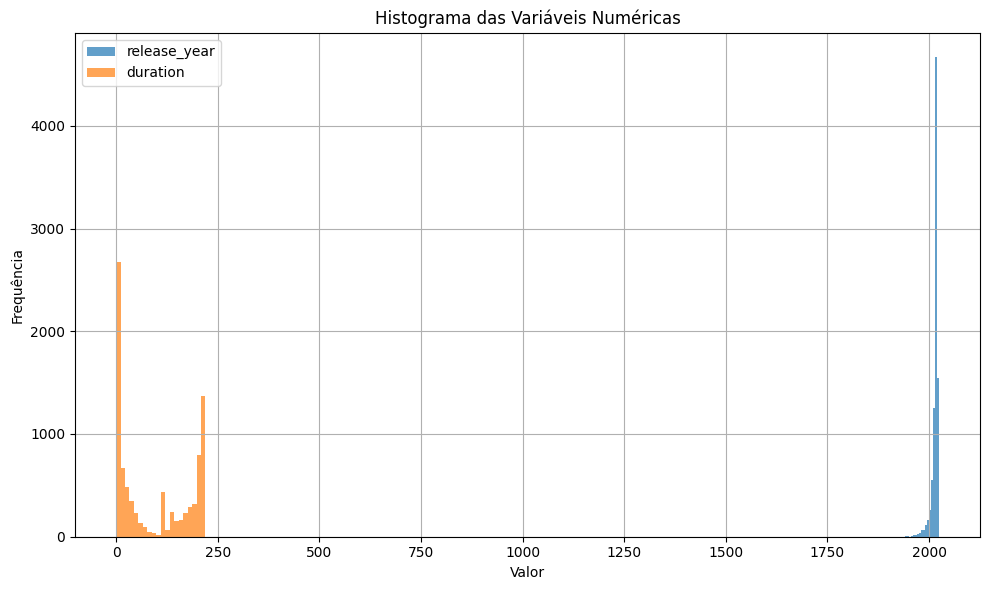

In [24]:
# 2. Separar as variáveis numéricas manualmente
# Vamos supor que estamos interessados apenas nas variáveis 'release_year' e 'duration'
variaveis_numericas = ['release_year', 'duration']
dados_numericos = df[variaveis_numericas]

# 3. Plotar um histograma para as variáveis numéricas
plt.figure(figsize=(10, 6))
for coluna in dados_numericos.columns:
    plt.hist(dados_numericos[coluna], bins=20, alpha=0.7, label=coluna)

plt.title('Histograma das Variáveis Numéricas')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

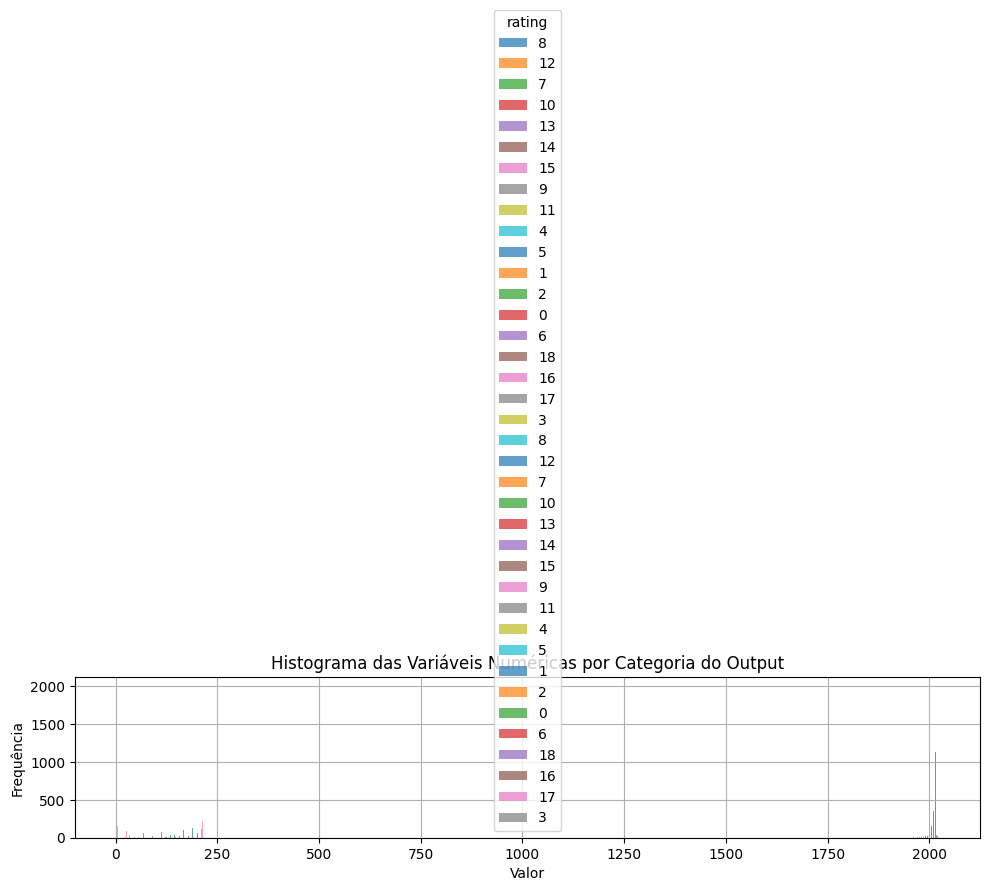

In [30]:

# 2. Separar as variáveis numéricas manualmente
# Vamos supor que estamos interessados apenas nas variáveis 'release_year' e 'duration', e o output é 'rating'
variaveis_numericas = ['release_year', 'duration']
output = 'rating'

# 3. Plotar um gráfico de frequência para as variáveis numéricas considerando o output como divisor
plt.figure(figsize=(10, 6))
for coluna in variaveis_numericas:
    plt.hist([df[df[output] == valor][coluna] for valor in df[output].unique()],
             bins=20, alpha=0.7, label=df[output].unique())

plt.title('Histograma das Variáveis Numéricas por Categoria do Output')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend(title=output)
plt.grid(True)
plt.tight_layout()
plt.show()

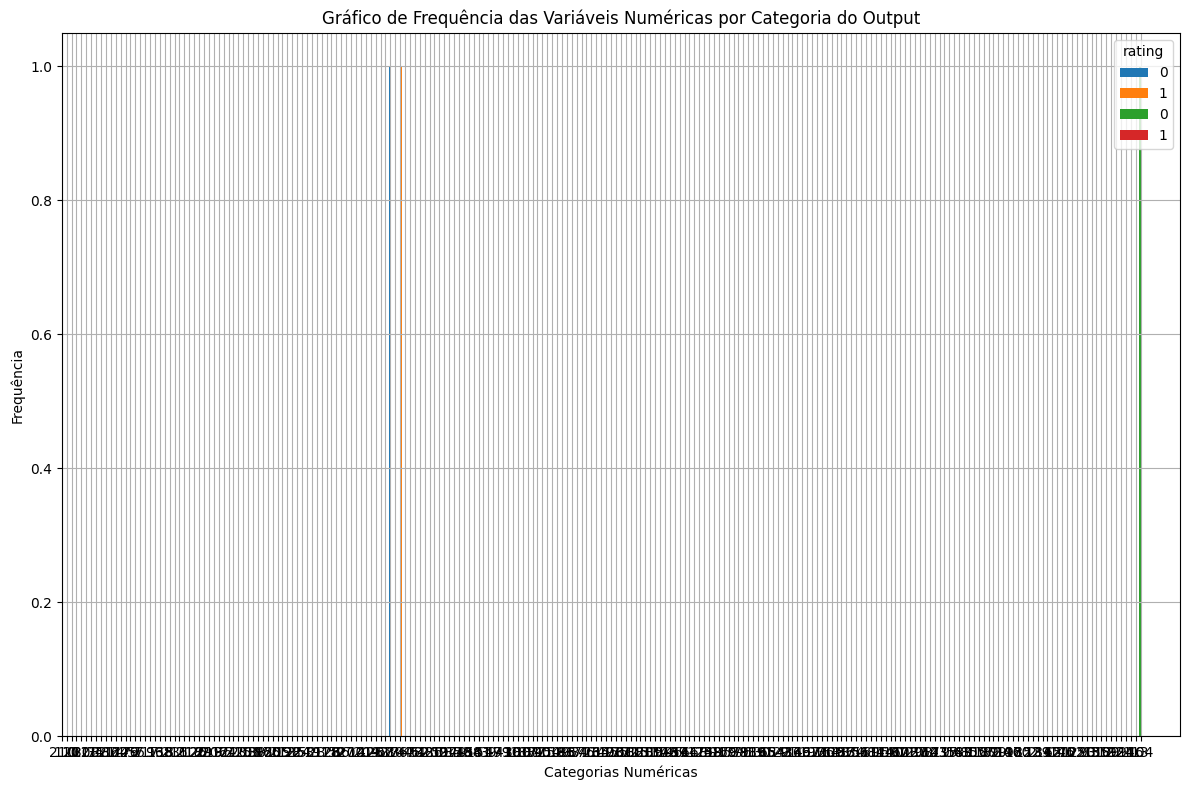

In [41]:
# 2. Plotar um gráfico de frequência para as variáveis numéricas considerando o output como divisor
output = 'rating'  # Suponha que 'rating' seja a variável de saída

# Criar uma figura para o gráfico
plt.figure(figsize=(12, 8))

# Loop sobre as variáveis numéricas
for i, coluna in enumerate(variaveis_numericas, 1):
    # Agrupar os dados pela variável de saída e calcular a frequência para cada categoria
    dados_agrupados = df.groupby([coluna, output]).size().unstack()

    # Obter as categorias únicas da variável numérica
    categorias_numericas = df[coluna].unique()

    # Calcular a largura de cada barra
    largura_barra = 0.35

    # Definir a posição das barras para cada categoria
    posicoes = np.arange(len(categorias_numericas))

    # Plotar as barras agrupadas
    plt.bar(posicoes - largura_barra / 2, dados_agrupados.iloc[:, 0], largura_barra, label=dados_agrupados.columns[0])
    plt.bar(posicoes + largura_barra / 2, dados_agrupados.iloc[:, 1], largura_barra, label=dados_agrupados.columns[1])

# Configurar o título e os rótulos dos eixos
plt.title('Gráfico de Frequência das Variáveis Numéricas por Categoria do Output')
plt.xlabel('Categorias Numéricas')
plt.ylabel('Frequência')
plt.xticks(np.arange(len(categorias_numericas)), categorias_numericas)
plt.legend(title=output)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

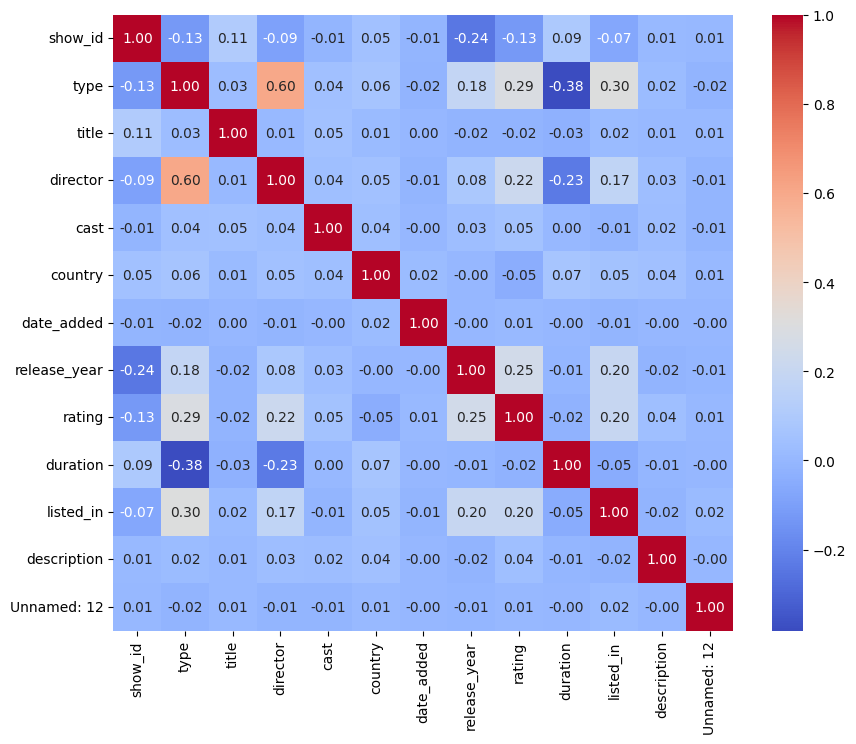

In [44]:

# Calcular a matriz de correlação
correlacao = df.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")

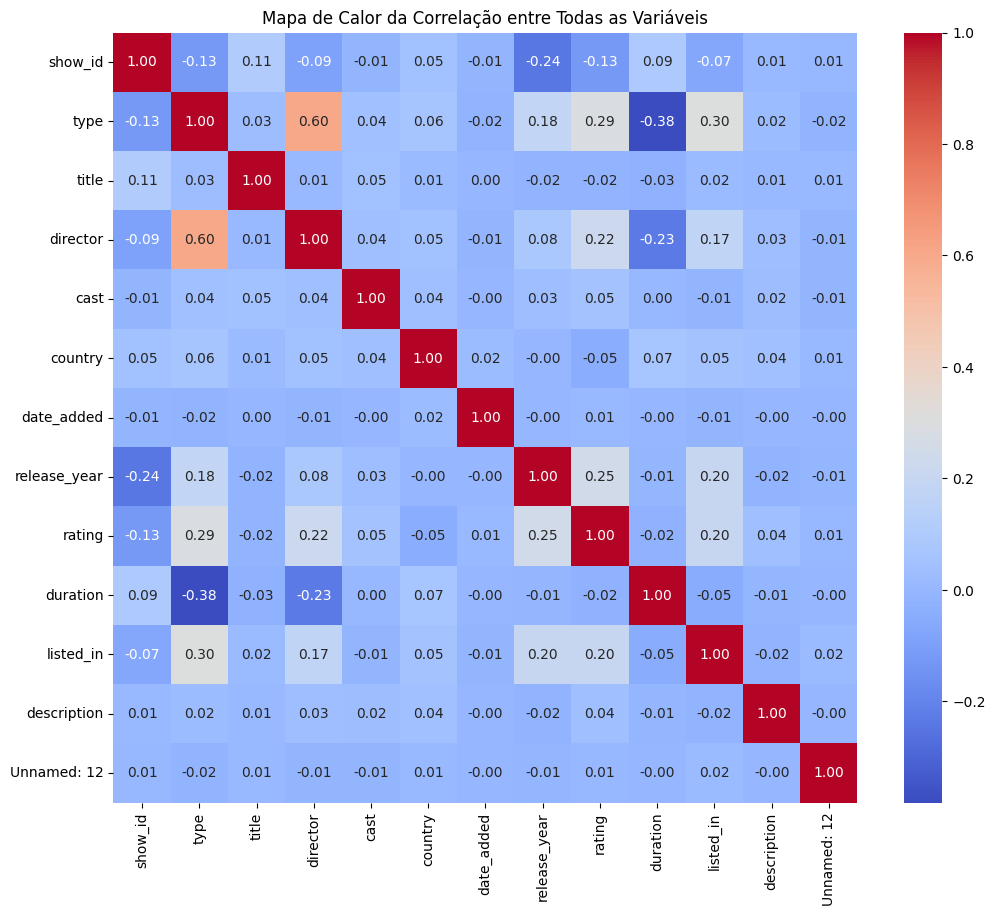

In [46]:
# Calcular a matriz de correlação
correlacao = df.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Todas as Variáveis')
plt.show()

# Perguntas e Respostas a Serem Feitas

Qual é a distribuição de filmes e programas de TV por país de origem?

Como a quantidade de filmes e programas de TV adicionados à plataforma tem variado ao longo dos anos?

Qual é a distribuição de classificações por idade (rating) dos filmes e programas de TV?

Existe alguma correlação entre a duração dos filmes e sua classificação por idade?

Quais são os diretores mais prolíficos no conjunto de dados?

Quais são os gêneros mais comuns de filmes e programas de TV?

Como a popularidade de diferentes gêneros varia entre os países de origem?

Qual é a tendência de lançamento de filmes e programas de TV ao longo dos anos?

Existe alguma relação entre a popularidade de um filme/programa de TV e sua classificação por idade?

Quais são os 10 filmes/programas de TV mais bem avaliados na plataforma?

Como a popularidade de diferentes gêneros de filmes/programas de TV varia ao longo dos anos?

Quais são os países que mais contribuem com filmes/programas de TV na plataforma?

Há alguma tendência na duração dos filmes ao longo dos anos?

Quais são os países que produzem os filmes mais longos?

Qual é a relação entre o país de origem e a
classificação por idade dos filmes/programas de TV?